<a href="https://colab.research.google.com/github/developerabhi14/ML-Notebooks/blob/main/Linear_Regression_using_Numpy_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import numpy as np

In [145]:
# Defining dummy data
np.random.seed(42)
n=1000

# Draw n samples from standard normal distribution
# Use only two features
x1 = np.random.randn(n)
x2 = np.random.randn(n)

# Generate some normally distributed noise to add data
noise = np.random.normal(0,5,n) # (mean, standardDeviation, size)

# Generateour target using independent variable and noise
y = 100 * x1 - 50 * x2 + 10 + noise

# Get our independent variables together and in shape
X = np.array([x1,x2]).T

In [146]:
# Defining a model

import matplotlib.pyplot as plt

class LinearRegression:
  def __init__(self):
    # intialize parameters
    self.bias = 0

  def fit(self, X, y, alpha=0.0001, n_iterations=100, tol=1e-6, patience =20):
    # Get number of observations and num features
    self.n, self.m = X.shape

    # Create array of weights, one for each feature
    self.weights = np.ones(self.m)

    # create an attribute to log the loss
    self.loss = []

    # Variable to track the previous loss
    prev_loss = float('inf')
    patience_counter = 0 # Counter to check how many epochs the loss hasn't improved

    # Iterate a number of times
    for _ in range(n_iterations):
      # Generate predictions
      y_hat = X @ self.weights + self.bias

      # Calculate error
      error = y - y_hat

      # Calculate loss (mse)
      mse = np.square(error).mean()
      if((_+1)%50==0):
        print(f"{_+1} epoch : Loss: {mse}")

      # Log the loss
      self.loss.append(mse)

      # Check if the loss has changed sufficiently
      if abs(prev_loss-mse) <= tol:

        patience_counter += 1


        # If the loss hasn't improved for patience consecutive epochs, stop
        if patience_counter >= patience:
          print(f"Early stopping at epoch {_+1}")
          break
      else:
          patience_counter=0 # Reset the patience counter if loss improved

      # update previous loss for the next comparison
      prev_loss = mse

      # Calculate gradients using partial derivatices
      gradient_wrt_weights = -(1/self.n) * X.T @ error #np.dot(X.T, error)
      gradient_wrt_bias = -(1/self.n) * np.sum(error)

      # Update parameters using gradients and alpha
      self.weights = self.weights - alpha * gradient_wrt_weights
      self.bias = self.bias - alpha * gradient_wrt_bias

  def predict(self, X):
    # Generate predictions using current weights and bias
    return X @ self.weights + self.bias

  def plot_loss_function(self):
    plt.plot(self.loss, label="Loss data")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()
    plt.show()

50 epoch : Loss: 11331.604164074492
100 epoch : Loss: 10258.994688400664
150 epoch : Loss: 9288.249628686606
200 epoch : Loss: 8409.683521023539
250 epoch : Loss: 7614.532939692607
300 epoch : Loss: 6894.868610668092
350 epoch : Loss: 6243.515913052851
400 epoch : Loss: 5653.982966837417
450 epoch : Loss: 5120.395582085698
500 epoch : Loss: 4637.438414010237
550 epoch : Loss: 4200.301731114236
600 epoch : Loss: 3804.6332602838406
650 epoch : Loss: 3446.494623988588
700 epoch : Loss: 3122.3219311117587
750 epoch : Loss: 2828.890124856442
800 epoch : Loss: 2563.280729083281
850 epoch : Loss: 2322.852668716838
900 epoch : Loss: 2105.21587085733
950 epoch : Loss: 1908.2073812675062
1000 epoch : Loss: 1729.8697562551947
1050 epoch : Loss: 1568.4315128972632
1100 epoch : Loss: 1422.2894412830733
1150 epoch : Loss: 1289.9926012048106
1200 epoch : Loss: 1170.227842678479
1250 epoch : Loss: 1061.8067050142847
1300 epoch : Loss: 963.6535630241071
1350 epoch : Loss: 874.7949014969885
1400 epoch :

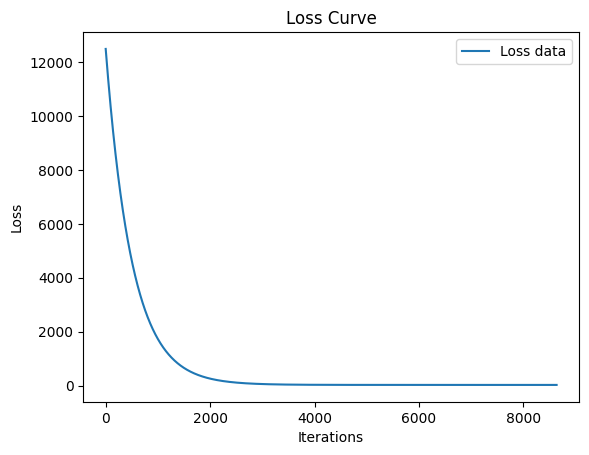

(array([100.08712219, -50.04667759]), 10.028049038021894)

In [147]:
# Instantiate model
model=LinearRegression()

# Fit the model to the data
model.fit(X, y, alpha = 0.001, n_iterations = 100000)

model.plot_loss_function()

# Make predictions
predictions = model.predict(X)

# View parameters
model.weights, model.bias

We have not used StandardScalar here, but it could be benificial because the scale of x1 and x2 is same but the scale of y is different, so lets see how the result differ using StandardScalar

In [148]:
from sklearn.preprocessing import StandardScaler
# Defining dummy data
np.random.seed(42)
n=1000

# Draw n samples from standard normal distribution
# Use only two features
x1 = np.random.randn(n)
x2 = np.random.randn(n)

# Generate some normally distributed noise to add data
noise = np.random.normal(0,5,n) # (mean, standardDeviation, size)

# Generateour target using independent variable and noise
y = 100 * x1 - 50 * x2 + 10 + noise

# Get our independent variables together and in shape
X = np.array([x1,x2]).T

scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

# Apply StandardScaler to y
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1,1)).flatten()


In [149]:
y.shape, X.shape

((1000,), (1000, 2))

50 epoch : Loss: 1.8997417665105203
100 epoch : Loss: 1.720003599791739
150 epoch : Loss: 1.5573130427730564
200 epoch : Loss: 1.4100507984213235
250 epoch : Loss: 1.2767516089263893
300 epoch : Loss: 1.1560895807071416
350 epoch : Loss: 1.0468649095351081
400 epoch : Loss: 0.947991871996816
450 epoch : Loss: 0.858487962317013
500 epoch : Loss: 0.7774640651391153
550 epoch : Loss: 0.7041155653246026
600 epoch : Loss: 0.6377143052958519
650 epoch : Loss: 0.5776013090033625
700 epoch : Loss: 0.5231801993353303
750 epoch : Loss: 0.4739112427837092
800 epoch : Loss: 0.42930596150727435
850 epoch : Loss: 0.3889222586529947
900 epoch : Loss: 0.35236000797028283
950 epoch : Loss: 0.3192570634309039
1000 epoch : Loss: 0.2892856487979187
1050 epoch : Loss: 0.2621490909129146
1100 epoch : Loss: 0.237578863930706
1150 epoch : Loss: 0.21533191485971684
1200 epoch : Loss: 0.1951882435960929
1250 epoch : Loss: 0.17694871319886188
1300 epoch : Loss: 0.1604330684680965
1350 epoch : Loss: 0.14547814298

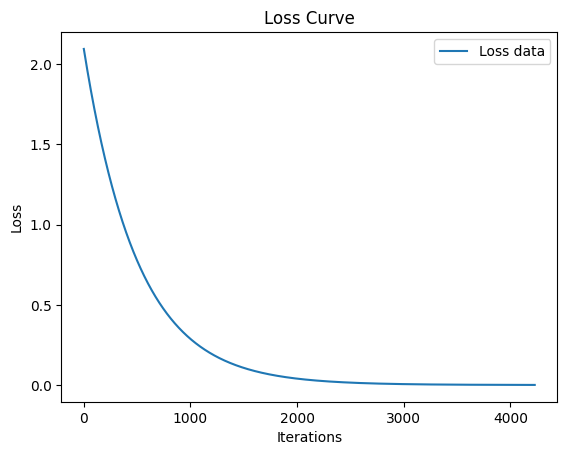

(array([ 0.88148461, -0.42448493]), 2.1784574144589875e-17)

In [150]:
# Instantiate model
model=LinearRegression()

# Fit the model to the data
model.fit(X, y, alpha = 0.001, n_iterations = 100000)

model.plot_loss_function()

# Make predictions
predictions = model.predict(X)
# Inverse transform the predictions to get them back to the original scale
y_pred_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

# View parameters
model.weights, model.bias